In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\First Quadrant Labs Projects\Power Consumption Prediction\Power Consumption Prediction\powerconsumption.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [4]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [5]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [6]:
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

# *EDA*

In [7]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [8]:
# Feature engineering: extract time-based features
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['WeekOfYear'] = df['Datetime'].dt.isocalendar().week.astype(int)

In [9]:
df.set_index('Datetime', inplace=True)

In [10]:
# Set visualization style
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (12, 6)

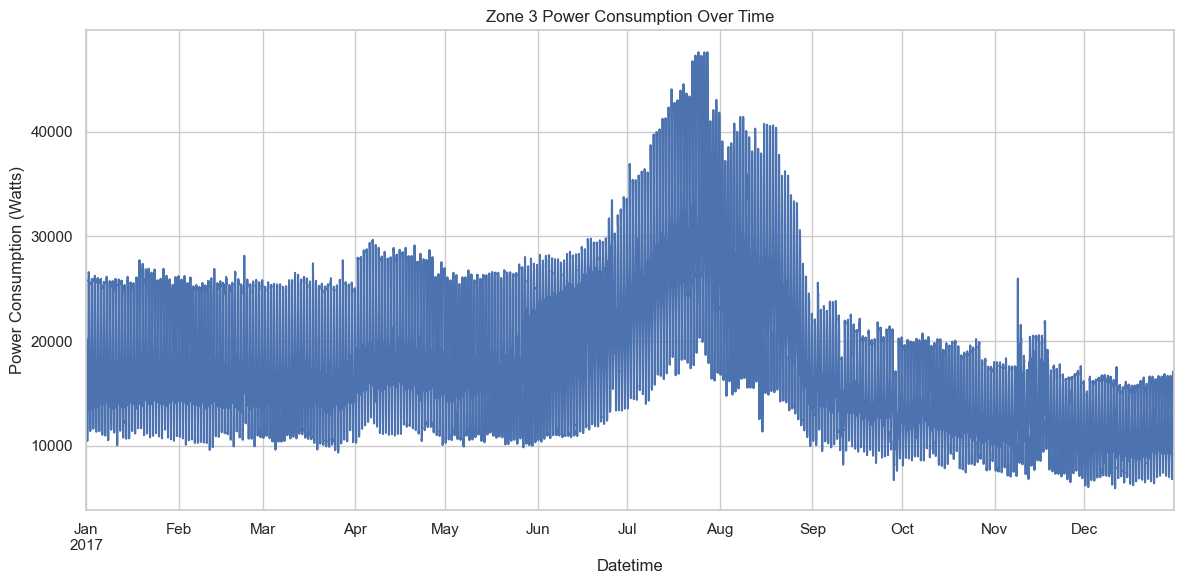

In [11]:
# 1. Time Series Plot: Power consumption over the year
df['PowerConsumption_Zone3'].plot(title='Zone 3 Power Consumption Over Time')
plt.ylabel('Power Consumption (Watts)')
plt.xlabel('Datetime')
plt.tight_layout()
plt.show()

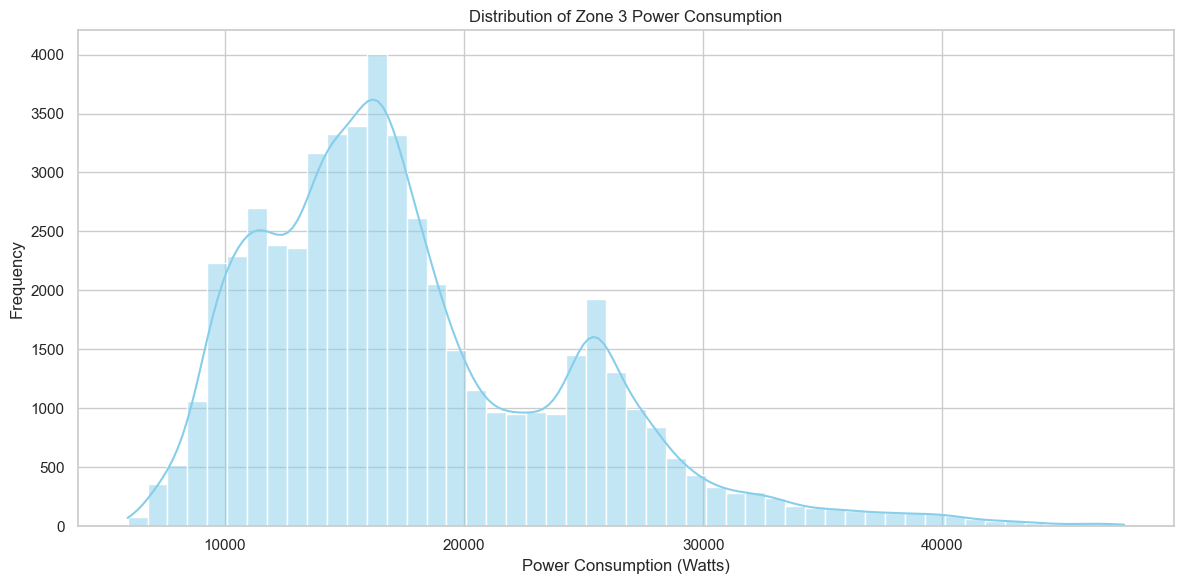

In [12]:
# 2. Distribution Plot of Zone 3 Consumption
sns.histplot(df['PowerConsumption_Zone3'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Zone 3 Power Consumption')
plt.xlabel('Power Consumption (Watts)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

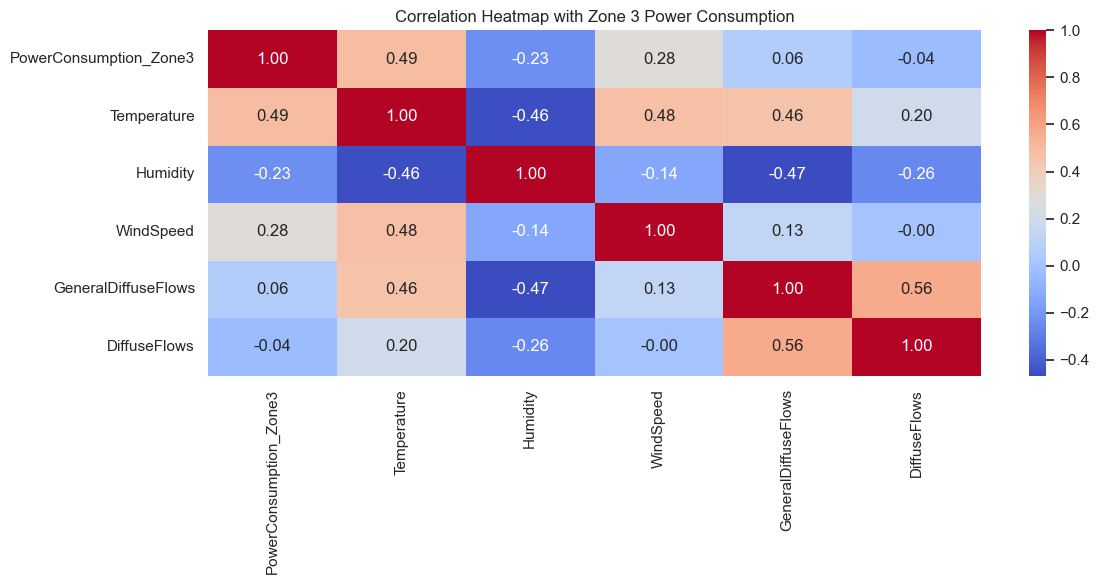

In [13]:
# 3. Correlation Heatmap
corr = df[['PowerConsumption_Zone3', 'Temperature', 'Humidity', 'WindSpeed',
           'GeneralDiffuseFlows', 'DiffuseFlows']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Zone 3 Power Consumption')
plt.tight_layout()
plt.show()

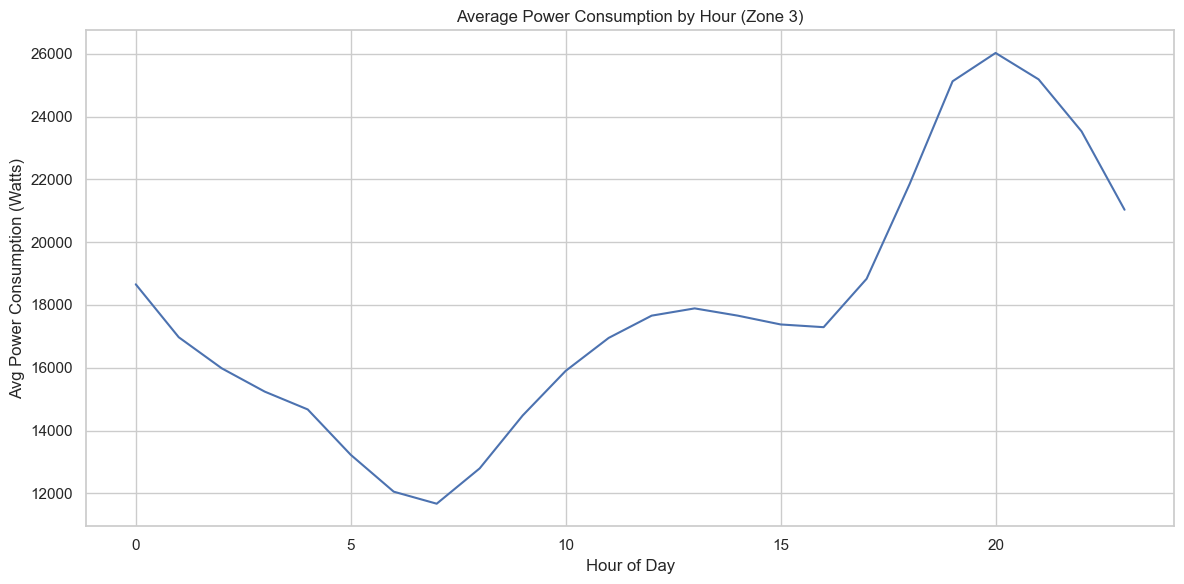

In [14]:
# 4. Average Power Consumption by Hour
hourly_avg = df.groupby('Hour')['PowerConsumption_Zone3'].mean()
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title('Average Power Consumption by Hour (Zone 3)')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Power Consumption (Watts)')
plt.tight_layout()
plt.show()

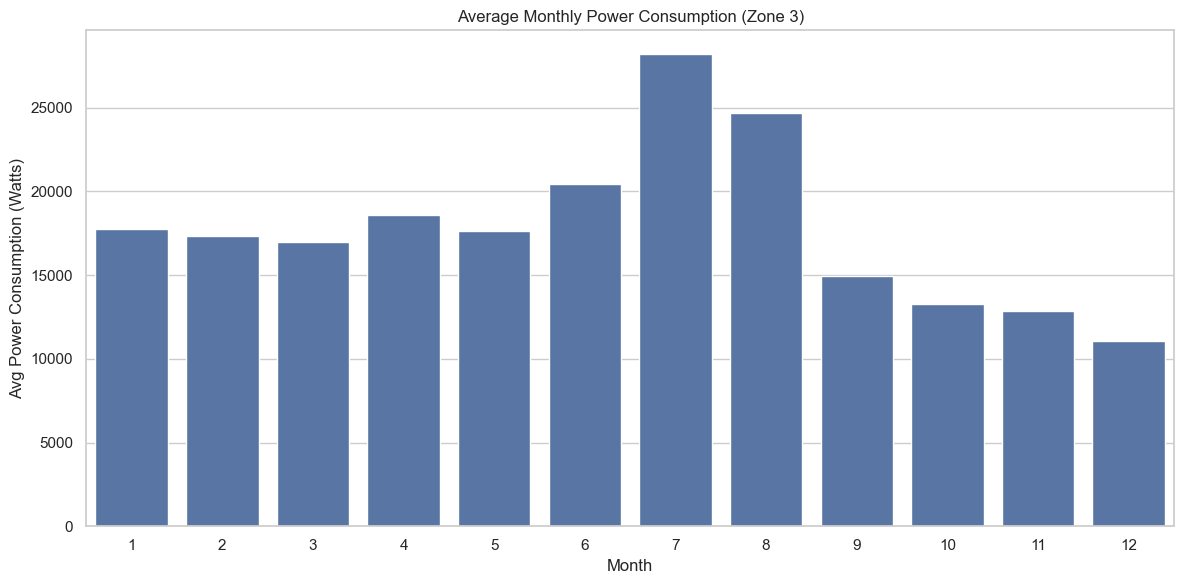

In [15]:
# 5. Monthly Power Consumption Trend
monthly_avg = df.groupby('Month')['PowerConsumption_Zone3'].mean()
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Monthly Power Consumption (Zone 3)')
plt.xlabel('Month')
plt.ylabel('Avg Power Consumption (Watts)')
plt.tight_layout()
plt.show()

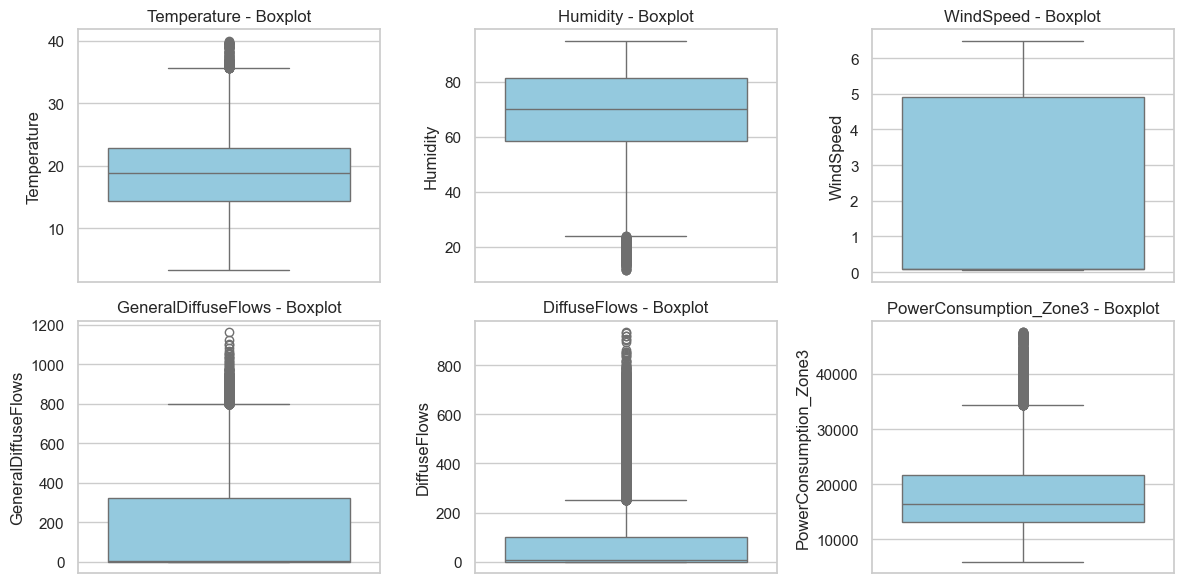

In [16]:
# Features to check
features = [
    'Temperature', 'Humidity', 'WindSpeed',
    'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone3'
]

# Plot boxplots
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()

for idx, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'{feature} - Boxplot')

plt.tight_layout()
plt.show()

In [17]:
# Select relevant features for the feature set
feature_set = df[[
    'Temperature',
    'Humidity',
    'WindSpeed',
    'GeneralDiffuseFlows',
    'DiffuseFlows',
    'Hour',
    'DayOfWeek',
    'Month'
]]

# Target variable
target = df['PowerConsumption_Zone3']

# Display the feature set and target variable shapes
feature_set.shape, target.shape

((52416, 8), (52416,))

In [18]:
from sklearn.model_selection import train_test_split

# *Model Selection*

In [19]:
X = feature_set
y = target

In [20]:
# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41932, 8), (10484, 8), (41932,), (10484,))

In [21]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [22]:
# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [23]:
# Train XGBoost
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [24]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n {model_name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

In [25]:
# Evaluate model
evaluate_model(y_test, y_pred_rf, "Random Forest")


 Random Forest
MAE : 468.8238487982916
RMSE: 748.9765072485136
R²  : 0.9871351464747238


In [26]:
# Evaluate  models
evaluate_model(y_test, y_pred_xgb, "XGBoost")


 XGBoost
MAE : 672.926271849792
RMSE: 953.3845546391078
R²  : 0.979154866624234


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

In [29]:
# Evaluate
evaluate_model(y_test, y_pred_gbr, "Gradient Boosting Regressor")


 Gradient Boosting Regressor
MAE : 1215.1188320428816
RMSE: 1705.9080149395488
R²  : 0.9332610032393328


# *Hyperparameter Tuning*

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'max_features': ['auto', 'sqrt']
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred_rf_best = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_rf_best, "Random Forest (Tuned)")

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\Kavita\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kavita\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kavita\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Kavita\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Kavita\anaconda3\Lib\site-pack


 Random Forest (Tuned)
MAE : 560.8373217819533
RMSE: 843.6503407116516
R²  : 0.983677246313822


In [32]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42, verbosity=0)

xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid,
                        cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "XGBoost (Tuned)")

Fitting 3 folds for each of 32 candidates, totalling 96 fits

 XGBoost (Tuned)
MAE : 687.0659400177265
RMSE: 967.016803585522
R²  : 0.9785544842036579


In [33]:
gbr_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

gbr = GradientBoostingRegressor(random_state=42)

gbr_grid = GridSearchCV(estimator=gbr, param_grid=gbr_param_grid,
                        cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
gbr_grid.fit(X_train, y_train)

best_gbr = gbr_grid.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)
evaluate_model(y_test, y_pred_gbr, "Gradient Boosting (Tuned)")

Fitting 3 folds for each of 16 candidates, totalling 48 fits

 Gradient Boosting (Tuned)
MAE : 815.7976877087157
RMSE: 1153.7168634790396
R²  : 0.9694742083401746
